# 'Adventure' Playlist - Music Recommendations For Variety And The Long Tail

# Notebook 02 - EDA

&nbsp;

**By: [Jonathan Yeung](https://github.com/jonathan-yeung)**

In this notebook, I intend to look closer into the user engagement and the track exposure on the music streaming platforms using the dataset *df_user_track*. By using the `playcount` variable available in the dataset, we could have an outlook of how much the users interact with the platform and how much exposure to users the tracks in the long-tail market have.

---

# Table of Contents

1. [**Imports**](#Imports)<br>

2. [**Data**](#Data)<br>

3. [**Total counts**](#Total-counts)<br>

4. [**Analyzing the user activities**](#user_act)<br>
  4.1 [Number of tracks played by users](#NumTrackUser)<br>
  4.2 [Playcounts by users](#CountUser)<br>
  4.3 [Average playcounts per track by users](#AvgCountUser)<br>
  
5. [**Analyzing the track exposure**](#track_exp)<br>
  5.1 [Number of users who have listened for tracks](#NumUserTrack)<br>
  5.2 [Playcounts for tracks](#CountTrack)<br>
  5.3 [Zooming in to the top 10%](#top10)<br>
  5.4 [Average playcounts per user for tracks](#AvgCountTrack)<br>
  
6. [**Notebook Summary**](#Notebook-Summary)<br>

---

# Imports

In [2]:
# misc
import os

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [3]:
file_path = '/Users/jonwfyeung/Downloads/adventure_playlist/'

In [11]:
check_file_user = os.path.isfile(file_path + 'data/User_Listening_History.csv')
check_file_user_track = os.path.isfile(file_path + 'data/df_user_track.csv')
check_file_track_cleaned = os.path.isfile(file_path + 'data/df_track_cleaned.csv')

print(check_file_user)
print(check_file_user_track)
print(check_file_track_cleaned)

True
True
True


In [8]:
df_user = pd.read_csv(file_path + 'data/User_Listening_History.csv')
df_user.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [9]:
df_user_track = pd.read_csv(file_path + 'data/df_user_track.csv')
df_user_track.head(2).T

,0,1
track_id,TRIRLYL128F42539D1,TRIRLYL128F42539D1
user_id,b80344d063b5ccb3212f76538f3d9e43d87dca9e,fd13b9d49c54e00ff413fe3c095ba581c7fc611e
playcount,1,8
name,Nothing From Nothing,Nothing From Nothing
artist,Billy Preston,Billy Preston
spotify_preview_url,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,https://p.scdn.co/mp3-preview/340c79f3f19b448e...
spotify_id,0d42LKqrWFVu05jAv9mwwE,0d42LKqrWFVu05jAv9mwwE
tags,"soul, funk, piano, 70s, oldies","soul, funk, piano, 70s, oldies"
year,2010,2010
duration_ms,155453,155453


In [14]:
df_track_cleaned = pd.read_csv(file_path + 'data/df_track_cleaned.csv')
df_track_cleaned.head(2).T

,0,1
track_id,TRIOREW128F424EAF0,TRRIVDJ128F429B0E8
name,Mr. Brightside,Wonderwall
artist,The Killers,Oasis
spotify_preview_url,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,https://p.scdn.co/mp3-preview/d012e536916c927b...
spotify_id,09ZQ5TmUG8TSL56n0knqrj,06UfBBDISthj1ZJAtX4xjj
tags,"rock, alternative, indie, alternative_rock, in...","rock, alternative, indie, pop, alternative_roc..."
year,2004,2006
duration_ms,222200,258613
danceability,0.355,0.409
energy,0.918,0.892


---

# Total counts

In [17]:
# Total number of playcounts from all users in the dataset
total_playcount = df_user['playcount'].sum()
print(f"Total number of playcounts from all users in the dataset: {total_playcount}")

Total number of playcounts from all users in the dataset: 25549912


In [18]:
# Total number of users in the dataset
total_n_users = df_user['user_id'].nunique()
print(f"Total number of users in the dataset: {total_n_users}")

Total number of users in the dataset: 962037


In [23]:
# Total number of tracks in df_track_cleaned
total_n_tracks = df_track_cleaned['track_id'].nunique()
print(f"Total number of tracks in df_track_cleaned: {total_n_tracks}")

Total number of tracks in df_track_cleaned: 49548


---

# Analyzing the user activities <a name="user_act"></a>

Here we will use three metrics for analysis:
- `n_tracks_played`: number of tracks played by each user
- `playcount`: number of total playcounts by each user
- `avg_playcounts_per_track`: average playcounts per track for each user

In [158]:
# number of tracks played by each user
df_user_stat = df_user.groupby('user_id', as_index=False)['track_id'].count()\
                        .rename(columns={'track_id': 'n_tracks_played'})

df_user_stat.head()

,user_id,n_tracks_played
0,00000b722001882066dff9d2da8a775658053ea0,1
1,00001638d6189236866af9bbf309ae6c2347ffdc,1
2,0000175652312d12576d9e6b84f600caa24c4715,1
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,8
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,9


In [159]:
# number of total playcounts by each user
df_user_stat2 = df_user.groupby('user_id', as_index=False)['playcount'].sum()

df_user_stat2.head()

,user_id,playcount
0,00000b722001882066dff9d2da8a775658053ea0,1
1,00001638d6189236866af9bbf309ae6c2347ffdc,1
2,0000175652312d12576d9e6b84f600caa24c4715,1
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,13
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,9


In [160]:
# getting average playcounts per track for each user
# putting the three metrics into one dataframe
df_user_stat['playcount'] = df_user_stat2['playcount'].copy()
df_user_stat['avg_playcounts_per_track'] = (df_user_stat['playcount']/df_user_stat['n_tracks_played']).round(1).copy()
df_user_stat.head()

,user_id,n_tracks_played,playcount,avg_playcounts_per_track
0,00000b722001882066dff9d2da8a775658053ea0,1,1,1.0
1,00001638d6189236866af9bbf309ae6c2347ffdc,1,1,1.0
2,0000175652312d12576d9e6b84f600caa24c4715,1,1,1.0
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,8,13,1.6
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,9,9,1.0


## Number of tracks played by users <a name="NumTrackUser"></a>

In [129]:
df_user_stat['n_tracks_played'].describe()

count    962037.000000
mean         10.094519
std          14.555314
min           1.000000
25%           3.000000
50%           5.000000
75%          11.000000
max         784.000000
Name: n_tracks_played, dtype: float64

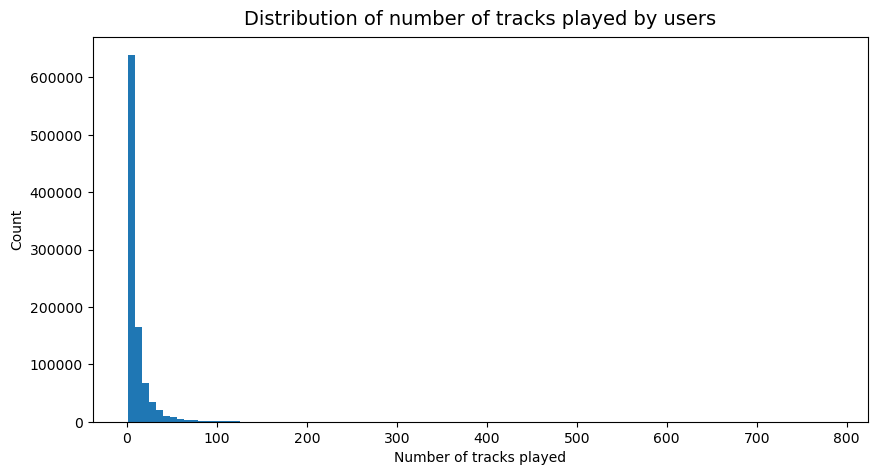

In [190]:
plt.figure(figsize=(10,5))
df_user_stat['n_tracks_played'].plot(kind='hist', bins=100)
plt.xlabel('Number of tracks played')
plt.ylabel('Count')
plt.title('Distribution of number of tracks played by users', fontsize=14, y=1.01)
plt.show()

## Playcounts by users <a name="CountUser"></a>

In [133]:
df_user_stat['playcount'].describe()

count    962037.000000
mean         26.558139
std          44.130748
min           1.000000
25%           5.000000
50%          12.000000
75%          30.000000
max        2953.000000
Name: playcount, dtype: float64

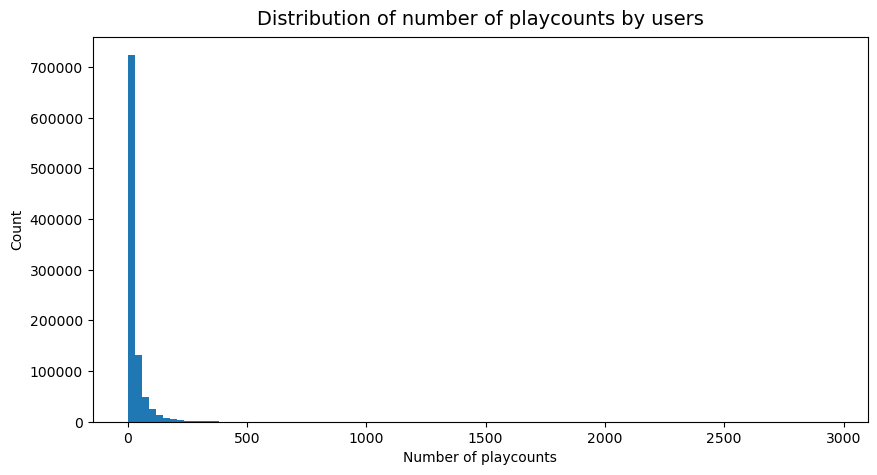

In [191]:
plt.figure(figsize=(10,5))
df_user_stat['playcount'].plot(kind='hist', bins=100)
plt.xlabel('Number of playcounts')
plt.ylabel('Count')
plt.title('Distribution of number of playcounts by users', fontsize=14, y=1.01)
plt.show()

## Average playcounts per track by users <a name="AvgCountUser"></a>

In [151]:
df_user_stat['avg_playcounts_per_track'].describe()

count    962037.000000
mean          2.993586
std           4.784931
min           1.000000
25%           1.100000
50%           1.800000
75%           3.100000
max         920.500000
Name: avg_playcounts_per_track, dtype: float64

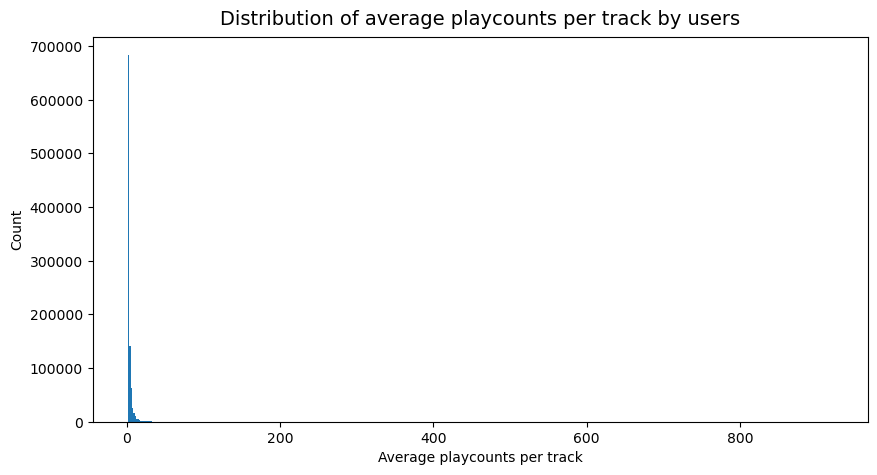

In [192]:
plt.figure(figsize=(10,5))
df_user_stat['avg_playcounts_per_track'].plot(kind='hist', bins=500)
plt.xlabel('Average playcounts per track')
plt.ylabel('Count')
plt.title('Distribution of average playcounts per track by users', fontsize=14, y=1.01)
plt.show()

From the above data and charts, we know that at least 75% of the users:

- listened to not more than 11 tracks
- had not more than 30 playcounts in total
- had playcounts per track not more than 3.1

We do not have information about the time period the above data accounts for, but even if it accounts for only 30 days' user behaviour, "30 playcounts" means that on average 1 playcount per day. It is quite low given people's extensive interactions with social media nowadays. "11 tracks" can also be considered a low number given the large amount of tracks available in the database.

This shows that most users in the dataset were not very engaged with the platforms, and did not interact with many tracks in the database. Certainly, the user engagement part is an area worth looking deeper into for more improvement for the music streaming platforms.

---

# Analyzing the track exposure <a name="track_exp"></a>

Here we will use three metrics:
- `n_users_listened`: number of users who have listened for each track
- `playcount`: number of playcounts gained for each track
- `avg_playcounts_per_user`: average playcounts per user for each track

In [161]:
# number of users who have listened for each track
df_track_stat = df_user.groupby('track_id', as_index=False)['user_id'].count()\
                    .rename(columns={'user_id': 'n_users_listened'})

df_track_stat.head()

,track_id,n_users_listened
0,TRAAAED128E0783FAB,161
1,TRAAAHD128F42635A5,2
2,TRAAAQO12903CD8E1C,1
3,TRAABJS128F9325C99,945
4,TRAABXA128F9326351,18


In [162]:
# number of playcounts gained for each track
df_track_stat2 = df_user.groupby('track_id', as_index=False)['playcount'].sum()

df_track_stat2.head()

,track_id,playcount
0,TRAAAED128E0783FAB,315
1,TRAAAHD128F42635A5,2
2,TRAAAQO12903CD8E1C,1
3,TRAABJS128F9325C99,1831
4,TRAABXA128F9326351,37


In [163]:
# getting the average playcounts per user for each track
# putting the three metrics into one dataframe
df_track_stat['playcount'] = df_track_stat2['playcount'].copy()
df_track_stat['avg_playcounts_per_user'] = (df_track_stat['playcount']/df_track_stat['n_users_listened']).round(1)
df_track_stat.head()

,track_id,n_users_listened,playcount,avg_playcounts_per_user
0,TRAAAED128E0783FAB,161,315,2.0
1,TRAAAHD128F42635A5,2,2,1.0
2,TRAAAQO12903CD8E1C,1,1,1.0
3,TRAABJS128F9325C99,945,1831,1.9
4,TRAABXA128F9326351,18,37,2.1


## Number of users who have listened for tracks <a name="NumUserTrack"></a>

In [52]:
df_track_stat['n_users_listened'].describe()

count    30459.000000
mean       318.831905
std       1105.034895
min          1.000000
25%         13.000000
50%         57.000000
75%        255.000000
max      80656.000000
Name: n_users_listened, dtype: float64

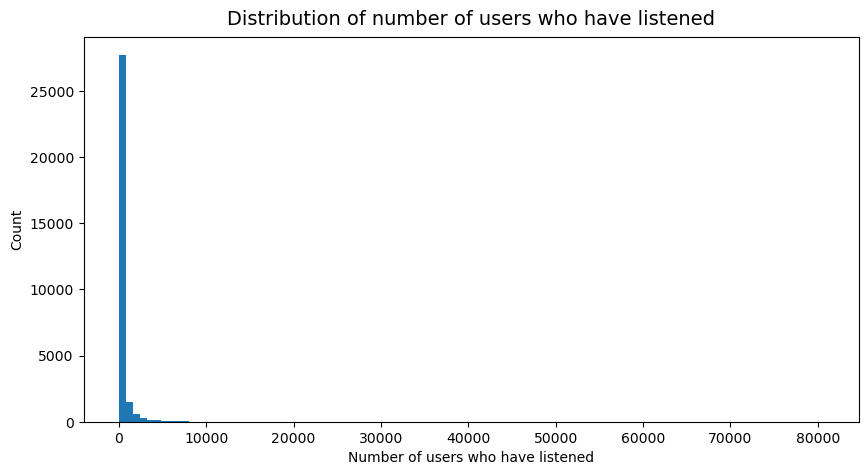

In [193]:
plt.figure(figsize=(10,5))
df_track_stat['n_users_listened'].plot(kind='hist', bins=100)
plt.xlabel('Number of users who have listened')
plt.ylabel('Count')
plt.title('Distribution of number of users who have listened', fontsize=14, y=1.01)
plt.show()

## Playcounts for tracks <a name="CountTrack"></a>

In [154]:
df_track_stat['playcount'].describe()

count     30459.000000
mean        838.829640
std        4220.627823
min           1.000000
25%          28.000000
50%         135.000000
75%         592.000000
max      527893.000000
Name: playcount, dtype: float64

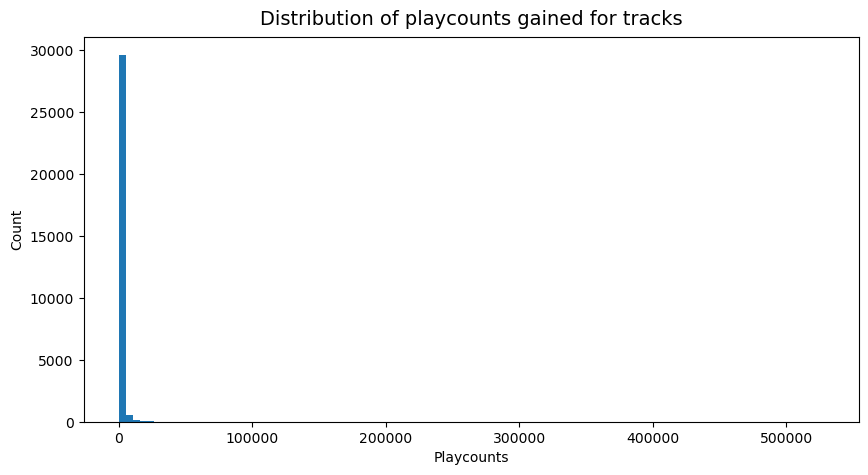

In [194]:
plt.figure(figsize=(10,5))
df_track_stat['playcount'].plot(kind='hist', bins=100)
plt.xlabel('Playcounts')
plt.ylabel('Count')
plt.title('Distribution of playcounts gained for tracks', fontsize=14, y=1.01)
plt.show()

## Zooming in to the top 10% <a name="top10"></a>

In [206]:
# looking into the list of the top 25% tracks by playcounts
percentile_90 = np.percentile(df_track_stat['playcount'], 90)

df_track_top10p = df_track_stat[df_track_stat['playcount'] > percentile_90]\
                            .sort_values(by='playcount', ascending=False)\
                            .reset_index(drop=True)

df_track_top10p

,track_id,n_users_listened,playcount,avg_playcounts_per_user
0,TRONYHY128F92C9D11,80656,527893,6.5
1,TRUFTBY128F93450B8,39529,111615,2.8
2,TRZNAHL128F9327D5A,24592,111596,4.5
3,TRCPXID128F92D5D3C,30057,91461,3.0
4,TRPGPDK12903CCC651,27276,91448,3.4
...,...,...,...,...
3040,TRQNEFB128EF356B35,771,1820,2.4
3041,TRNAMFY128E0781A95,836,1819,2.2
3042,TRPLPIN12903CE9E20,603,1819,3.0
3043,TRPANMJ128F425BFB7,800,1819,2.3


In [207]:
print(f"The top 10% of tracks by playcounts got {df_track_top10p['playcount'].sum()*100/total_playcount:.2f}% of the total playcounts")

The top 10% of tracks by playcounts got 69.67% of the total playcounts


## Average playcounts per user for tracks <a name="AvgCountTrack"></a>

In [164]:
df_track_stat['avg_playcounts_per_user'].describe()

count    30459.000000
mean         2.443041
std          1.482293
min          1.000000
25%          1.700000
50%          2.200000
75%          2.800000
max         51.000000
Name: avg_playcounts_per_user, dtype: float64

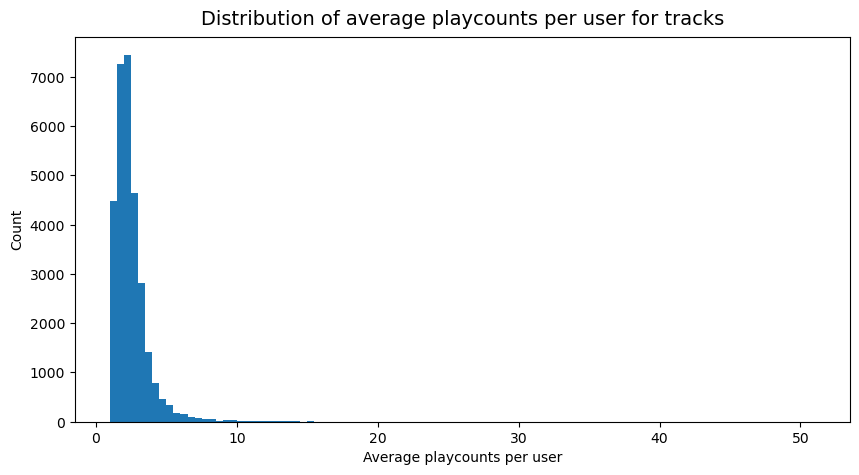

In [195]:
plt.figure(figsize=(10,5))
df_track_stat['avg_playcounts_per_user'].plot(kind='hist', bins=100)
plt.xlabel('Average playcounts per user')
plt.ylabel('Count')
plt.title('Distribution of average playcounts per user for tracks', fontsize=14, y=1.01)
plt.show()

From the above data and charts, we can easily see that 75% of the tracks:

- have not more than 255 users (out of 962,037 total users) listened to
- have not more than 592 playcounts
- have not more than 2.9 playcounts per user

The top 10% of tracks by playcounts got roughly 70% of all the playcounts, meaning that the remaining 90% of tracks share the other 30% of the total playcounts.

Most tracks do not have much exposure (measured by playcounts here) compared to the total of the platforms.

This is a pattern commonly seen in a long-tail market.

---

# Notebook Summary

The above statistics and EDA show that there really is low engagement of users with the platforms, and the platforms might consider improving the user engagement rates, which would be beneficial to the platforms themselves.

On the other hand, tracks (as a proxy of artists) in the long-tail market have low exposure on the platforms, shown by the statistics and EDA above. It might be natural to always have a long-tail curve by ranking in search engines or recommendation algorithms, and the niche artists, independent artists and new artists in the long-tail might need to pay more effort on their content optimization.

However, streaming platforms could also help improve their exposure by creating a new way of recommendations for those artists. If we could find potential fans from the users for the artists in the long-tail market by the power of recommender system, then this might actually benefit all the three entities - users, artists and the platforms.

The users might have more variety of their listening experience, which could be matched by the variety provided by the artists in the long-tail market, and might then be more engaged in the platform. The artists in the long-tail market might also be able to find potential listeners that would be interested in their music, and this could also boost their usage of the platforms. Finally, all these potential effects could also benefit the platforms by boosting the overall user engagement on both listeners and artists side and hence the value of the platforms.

Regarding the above views, the recommendation approach in this project, which will be demonstrated in Notebook 05, attempts to partly solve the afore-mentioned problem statement by matching the potential demand of the listeners' interests with the abundant supply of music and variety from the artists in the long-tail market.